# 10 - The Foundation of Inferential Statistics 
## The Law of Large Numbers(LLN) and The Central Limit Theorem (CLT)
## Using College Scorecard Data

Statistics as defined by the American Statistical Association (ASA) “is the science of learning from data, and of measuring, controlling and communicating uncertainty". Inferencial Statistics is one of the two main branches of statistics (the other is Descriptive Statistics). It uses a random sample of data taken from a population to describe and make inferences about the population which is typically unknown. Inferential statistics or statistical inference builds upon two theorems:

- The Law of Large Numbers (The mean of a large sample from a large number of trials is close to the mean of the distribution)
- The Central Limit Theorems (The sampling distribution of a sample mean is approximately a normal distribution even the underlying population distribution is not normal)



In [0]:
# Import useful Python libraries upfront

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import statistics
from pylab import rcParams

## Let's explore LLN first

LLN states that as the sample size increases, its mean gets closer to the average of the whole population. We are going to simulate the sampling of colleges. We start the sample size from 5 and increase by 10 each time until it reaches 1000. We calculate the sample means of college tuition and make a line plot against the sample sizes. We can see as the sample size increases, the sample mean converges to the population mean shown by a horizontal line.

In [4]:
df = pd.read_csv("Cleansed-Data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1693 entries, 0 to 1692
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   UNITID           1693 non-null   int64  
 1   ADM_RATE         1693 non-null   float64
 2   TUITIONFEE_IN    1693 non-null   int64  
 3   MD_EARN_WNE_P10  1693 non-null   int64  
dtypes: float64(1), int64(3)
memory usage: 53.0 KB


In [6]:
pop_mean = df['TUITIONFEE_IN'].mean()
pop_mean

22638.753101004135

In [7]:
# Frst, we generate sample means

sample_means = []
sample_sizes = range(5, 1000, 10)


#for size in sample_sizes:
#    sample = np.random.choice(a=DICE,  p=PROB, size=size)
#    sample_means.append(sample.mean())              # append the sameple mean to the list
# Instead of using for loopf, we use the parsimonious list comprehension 
sample_means = [df["TUITIONFEE_IN"].sample(s).mean() for s in sample_sizes] 

sample_means[:10]                     # display the first 10 sample means

[23045.0,
 29363.0,
 22783.08,
 21755.628571428573,
 21573.933333333334,
 23990.2,
 21523.015384615384,
 23434.28,
 23264.0,
 23633.926315789475]

Text(0.5, 0, 'Sample Size')

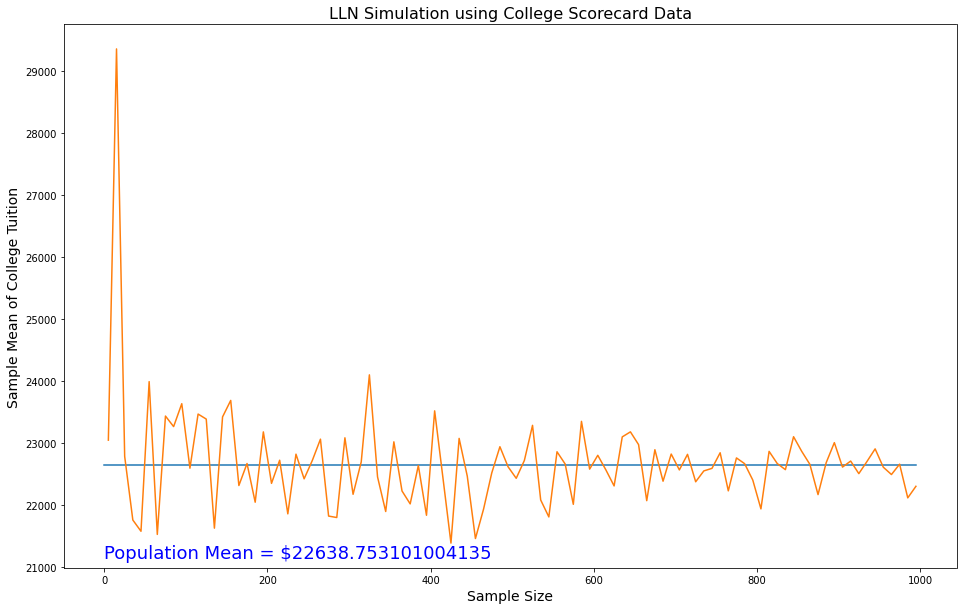

In [10]:
# Next, we make a line plot to show the relationship between sample mean and sample size

pop_mean = df["TUITIONFEE_IN"].mean()

fig, ax = plt.subplots(figsize=(16,10))

# draw a horizontal line of the population mean                                             
ax.plot((0,sample_sizes[-1]), (pop_mean, pop_mean)) 

# make a line plot of sample means (y-axis) along sample sizes (x-axis)
ax.plot(sample_sizes, sample_means) 
ax.text(0, pop_mean - 1500, "Population Mean = $" + str(pop_mean), fontsize=18, c="b")                   
ax.set_title("LLN Simulation using College Scorecard Data", size=16)
ax.set_ylabel("Sample Mean of College Tuition", size=14)
ax.set_xlabel("Sample Size", size=14)

## Let's explore the Central Limit Theorm (CLT)

CLT states that the sampling distribution of the sample mean of any independent, random variable will be normal or nearly normal, if the sample size is large enough. How large is "large enough"? The answer depends on two factors:

- **Requirements for accuracy**- The more closely the sampling distribution needs to resemble a normal distribution, the more sample points will be required.
- **The shape of the underlying population** - The more closely the original population resembles a normal distribution, the fewer sample points will be required. 

In practice, some statisticians say that a sample size of 30 is large enough when the population distribution is roughly bell-shaped. Others recommend a sample size of at least 40. But if the original population is distinctly not normal (e.g., is badly skewed, has multiple peaks, and/or has outliers), researchers like the sample size to be even larger.

As can be seen from the resulting plot, as sample size increases, the sampling distribution becomes closer to be normal and its mean converges to the population mean and its variance becomes smaller. This implies as the sample size increases we have more confidence that the sample mean approximates the population mean.

Text(0, 0.5, 'Density')

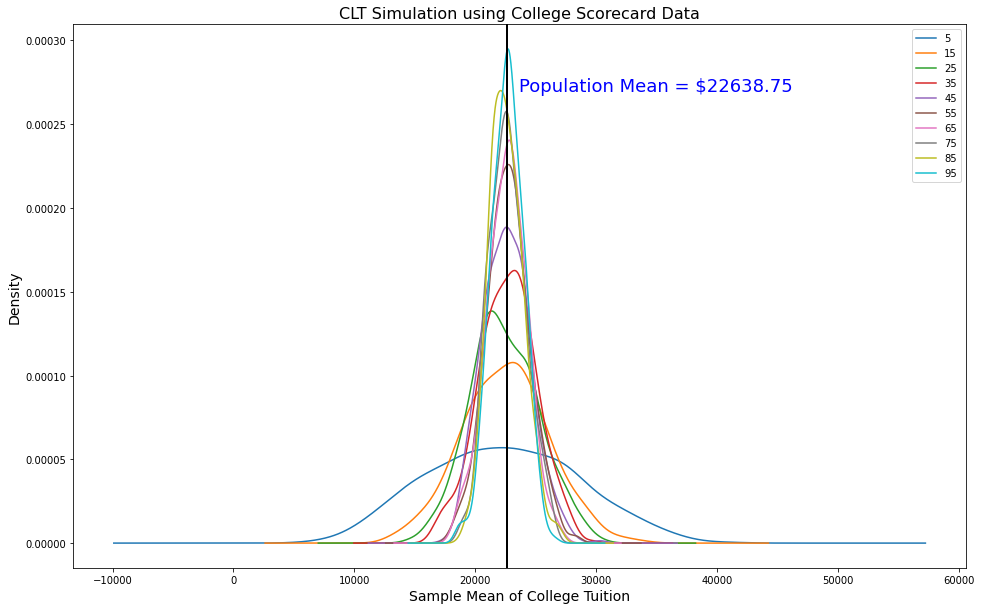

In [11]:
sample_sizes = range(5,100,10)

fig, ax = plt.subplots(figsize=(16,10))

for s in sample_sizes:     # sample sizes
    sample_means = []
    for i in range(500):        # repeat the experiment enough times to get a distribution
      sample = df["TUITIONFEE_IN"].sample(s)
      sample_means.append(sample.mean())              # append the sameple mean to the list

# The matplotlib histrogram does not look good. Use Pandas density plot instead.
#   ax.hist(sample_means, density=True, legend=True) 
    pd.DataFrame(sample_means).plot.density(ax=ax)

ax.legend(sample_sizes) 
ax.text(pop_mean + 1000, 0.00027, "Population Mean = $" + str(round(pop_mean,2)), fontsize=18, c="b")  

# draw a vertical line of the population mean 
ax.axvline(x=pop_mean, linewidth=2, color="k")  

ax.set_title("CLT Simulation using College Scorecard Data", size=16)
ax.set_xlabel("Sample Mean of College Tuition",size=14)
ax.set_ylabel("Density",size=14)

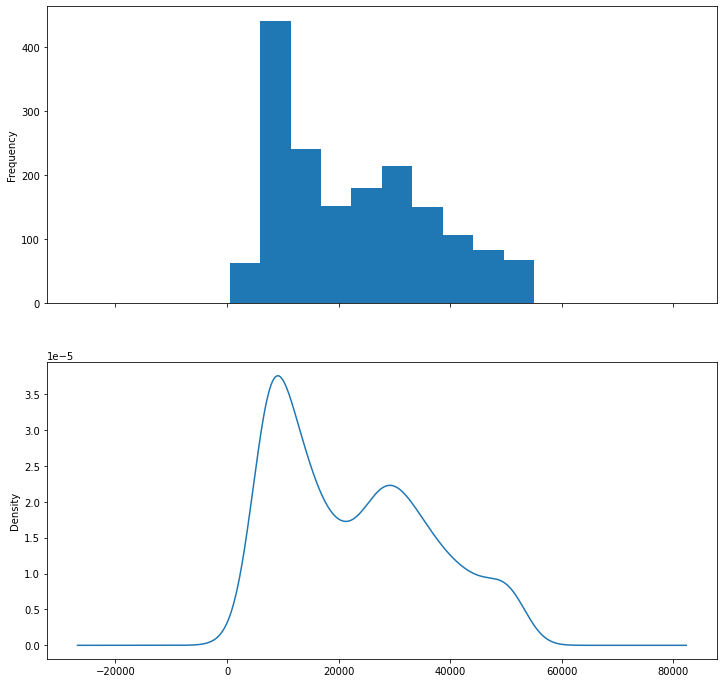

In [12]:
# Let's plot the histogram of tuitions to get a feel of the distribution
# Looks like it is nowhere near a normal distribution which has a bell-shaped curve
# But that does not matter much. What is important is that the sampling distribution of sample means is normal distribution

fig, ax = plt.subplots(2,sharex=True, figsize=(12,12))
ax[0].set_xlimit = (0, df["TUITIONFEE_IN"].max())
ax[1].set_xlimit = (0, df["TUITIONFEE_IN"].max())
df["TUITIONFEE_IN"].plot.hist(ax=ax[0])
df["TUITIONFEE_IN"].plot.density(ax=ax[1])